In [1]:
import pandas as pd
import os

files_names = []

#list of files to be read in the directory data
for file in os.listdir('data'):
    if file.endswith('.csv'):
        files_names.append(file)

files_names.sort()


In [2]:
dfs = []
updated_at = []

#read all files in the list and append them to the list dfs
for file in files_names:
    #get the first line with the updated_at information
    with open(f'data/{file}', 'r', encoding='ISO-8859-1') as f:
        updated_at.append(f.readline())
    df = pd.read_csv(f'data/{file}', sep=';', encoding='ISO-8859-1', skiprows=1)
    dfs.append(df)

#concatenate all files in the list dfs
df = dfs[0]
for i in range(1, len(dfs)):
    df = pd.concat([df, dfs[i]], ignore_index=True)


In [3]:

for d in dfs:
    print(d.shape)

(2449, 11)
(16480, 11)
(18235, 11)
(25574, 11)
(30175, 11)
(29376, 11)
(22002, 11)
(26056, 11)
(26768, 11)
(27023, 11)
(24492, 11)
(21634, 11)
(14090, 11)
(16827, 11)
(16782, 11)


In [4]:
df.tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
317958,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...","2893,04",2191398.0
317959,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...","1180,19",2192272.0
317960,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...","2671,9",2192274.0
317961,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...","1334,31",2192244.0
317962,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WMQWBX,30/12/2022,"Companhia Aérea: TAM, Localizador: WMQWBX. Pas...","2250,72",2193622.0


In [5]:
#check NaN values
df.isnull().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             24810
DATA                   3144
DETALHAMENTO         137332
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             2
dtype: int64

In [6]:
#check the data types
df.dtypes

ANO                    int64
MES                    int64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO     object
COD_DOCUMENTO        float64
dtype: object

In [7]:
#change the column DATA to datetime
df['date'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y', errors='coerce')
#COD_DOCUMENTO is a string, remove the .0
df['COD_DOCUMENTO'] = df['COD_DOCUMENTO'].astype(str).str.replace('.0', '')

#convert VALOR_REEMBOLSADO to float
df['value'] = df['VALOR_REEMBOLSADO'].str.replace('\r\n', '').str.replace(',', '.').astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19496\3459910737.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['COD_DOCUMENTO'] = df['COD_DOCUMENTO'].astype(str).str.replace('.0', '')


In [8]:
#select distinct values of DETALHAMENTO
detalhamento = df['DETALHAMENTO'].unique()
print(len(detalhamento))
tipo_despesa = df['TIPO_DESPESA'].unique()
print(len(tipo_despesa))
tipo_despesa

108502
7


array(['Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Divulgação da atividade parlamentar',
       'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Serviços de Segurança Privada'], dtype=object)

In [9]:
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek

In [10]:
df

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,date,value,month,day_of_week
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",08104,NaT,12351.52,NaN,NaN
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",08103,NaT,386.60,NaN,NaN
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",0808104,NaT,12351.52,NaN,NaN
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",0808103,NaT,2610.68,NaN,NaN
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",0818104,NaT,12351.52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317958,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...","2893,04",2191398,2022-12-06,2893.04,12.0,1.0
317959,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...","1180,19",2192272,2022-12-09,1180.19,12.0,4.0
317960,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...","2671,9",2192274,2022-12-20,2671.90,12.0,1.0
317961,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...","1334,31",2192244,2022-12-21,1334.31,12.0,2.0


In [11]:
#show the range of dates and the number of records
print(df['date'].min())
print(df['date'].max())

1901-01-19 00:00:00
2107-08-29 00:00:00


In [12]:
#Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Set municipal election years as 2020, 2016, 2012, 2008, 2004, 2000
#Set federal election years as 2018, 2014, 2010, 2006, 2002
df['Municipal_Election'] = df['date'].dt.year.isin([2020, 2016, 2012, 2008, 2004, 2000])
df['Federal_Election'] = df['date'].dt.year.isin([2018, 2014, 2010, 2006, 2002])

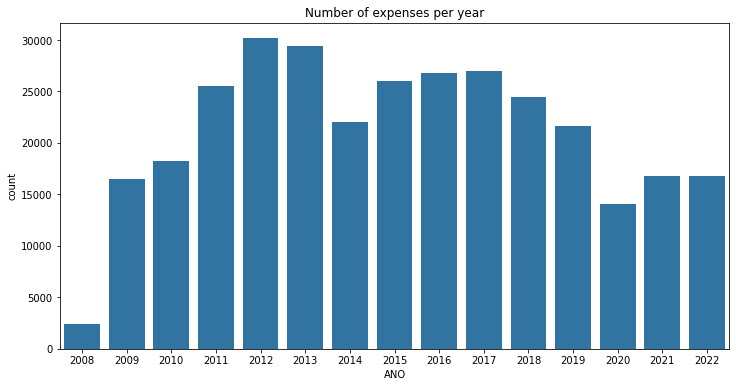

In [14]:
#plot the number of expenses per year in bar chart

plt.figure(figsize=(12, 6))
sns.countplot(x=df['ANO'].sort_values())
plt.title('Number of expenses per year')
plt.show()

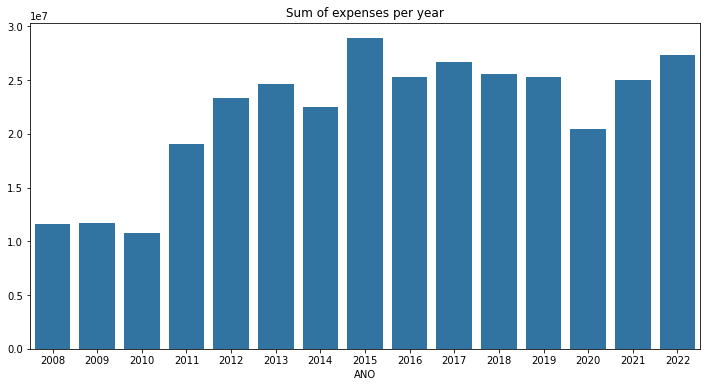

In [15]:
#sum of expenses per year
expenses_per_year = df.groupby(df['ANO'])['value'].sum()
#plot the sum of expenses per year in bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=expenses_per_year.index, y=expenses_per_year.values)
plt.title('Sum of expenses per year')
plt.show()

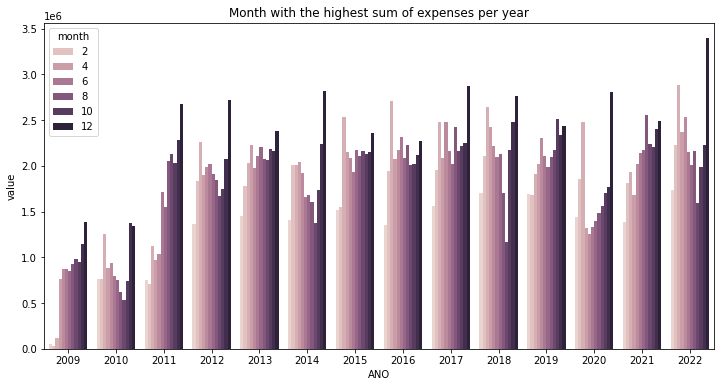

In [17]:
#Group by year and month
#show the months of each year with the highest sum of expenses
expenses_per_month = df.groupby(['ANO', 'month'])['value'].sum()
expenses_per_month = expenses_per_month.reset_index()
expenses_per_month = expenses_per_month.sort_values(by='value', ascending=False)

#plot for each year the month with the highest sum of expenses
plt.figure(figsize=(12, 6))
sns.barplot(x='ANO', y='value', hue='month', data=expenses_per_month)
plt.title('Month with the highest sum of expenses per year')
plt.show()

In [20]:
#expenses_per_month for the year 2022
expenses_per_month_2022 = expenses_per_month[expenses_per_month['ANO'] == 2022]
expenses_per_month_2022

,ANO,month,value
167,2022,12.0,3396086.80
158,2022,3.0,2887241.78
160,2022,5.0,2534985.40
159,2022,4.0,2374837.41
166,2022,11.0,2227530.29
157,2022,2.0,2223662.64
163,2022,8.0,2167248.96
161,2022,6.0,2152806.21
162,2022,7.0,2011093.14
165,2022,10.0,1990517.81


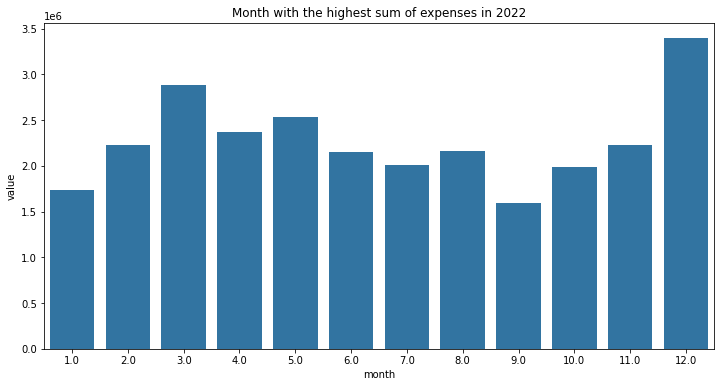

In [21]:
#plot 2022
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='value', data=expenses_per_month_2022)
plt.title('Month with the highest sum of expenses in 2022')
plt.show()